In [49]:
import numpy as np
import pandas as pd

In [ ]:
!pip install tensorflow 

In [ ]:
!pip install keras

# Forest

In [50]:
import tensorflow


In [51]:
import keras

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [53]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [54]:
forest=pd.read_csv('C:/Users/kishore/Downloads/forestfires.csv',delimiter=",")

In [55]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [56]:
from sklearn import preprocessing

In [57]:
label_encoder = preprocessing.LabelEncoder()
forest['size_category']= label_encoder.fit_transform(forest['size_category']) 

In [58]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
forest=forest[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','size_category']]

In [60]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,1


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train,test = train_test_split(forest,test_size = 0.3,random_state=42)

In [63]:
trainX=train.iloc[:,:8]

In [64]:
trainX

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
311,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0
368,91.2,94.3,744.4,8.4,16.8,47,4.9,0.0
23,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0
271,92.1,152.6,658.2,14.3,20.1,58,4.5,0.0
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0
...,...,...,...,...,...,...,...,...
71,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0
106,91.4,30.7,74.3,7.5,18.2,29,3.1,0.0
270,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0
435,90.8,84.7,376.6,5.6,23.8,51,1.8,0.0


In [65]:
trainY=train.iloc[:,-1:]

In [66]:
trainY

,size_category
311,0
368,0
23,1
271,0
299,1
...,...
71,1
106,1
270,1
435,1


In [67]:
testX=test.iloc[:,:8]

In [68]:
testY=test.iloc[:,-1:]

In [69]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model

In [70]:
column_names = list(forest.columns)

predictors = column_names[0:8]
target = column_names[8]


In [71]:
predictors

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [72]:
target

'size_category'

In [73]:
first_model = prep_model([8,50,1])

In [74]:
first_model.fit(np.array(forest[predictors]),np.array(forest[target]),epochs=900)

Epoch 1/900
17/17 [==============================] - 10s 17ms/step - loss: 3.8743 - accuracy: 0.7440
Epoch 2/900
17/17 [==============================] - 0s 3ms/step - loss: 0.8572 - accuracy: 0.6144
Epoch 3/900
17/17 [==============================] - 0s 1ms/step - loss: 0.8321 - accuracy: 0.6042
Epoch 4/900
17/17 [==============================] - 0s 1ms/step - loss: 0.8910 - accuracy: 0.6317
Epoch 5/900
17/17 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.6418
Epoch 6/900
17/17 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.6756
Epoch 7/900
17/17 [==============================] - 0s 10ms/step - loss: 0.9946 - accuracy: 0.5772
Epoch 8/900
17/17 [==============================] - 0s 14ms/step - loss: 0.7182 - accuracy: 0.6648
Epoch 9/900
17/17 [==============================] - 0s 13ms/step - loss: 0.7889 - accuracy: 0.6106
Epoch 10/900
17/17 [==============================] - 0s 6ms/step - loss: 0.8098 - accuracy: 0.6243
Epoc

Epoch 83/900
17/17 [==============================] - 0s 2ms/step - loss: 0.7856 - accuracy: 0.6474
Epoch 84/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6958
Epoch 85/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.7081
Epoch 86/900
17/17 [==============================] - 0s 2ms/step - loss: 0.8565 - accuracy: 0.6043
Epoch 87/900
17/17 [==============================] - 0s 4ms/step - loss: 0.7453 - accuracy: 0.7257
Epoch 88/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.7228
Epoch 89/900
17/17 [==============================] - 0s 3ms/step - loss: 0.7530 - accuracy: 0.6751
Epoch 90/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6810
Epoch 91/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6614 - accuracy: 0.6653
Epoch 92/900
17/17 [==============================] - 0s 1ms/step - loss: 0.9845 - accuracy: 0.6194


17/17 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7303
Epoch 165/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7398
Epoch 166/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6853
Epoch 167/900
17/17 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.6886
Epoch 168/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7566
Epoch 169/900
17/17 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.7375
Epoch 170/900
17/17 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.6806
Epoch 171/900
17/17 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.7016
Epoch 172/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7124
Epoch 173/900
17/17 [==============================] - 0s 2ms/step - loss: 0.8189 - accuracy: 0.6737
Epoc

17/17 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.7206
Epoch 245/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6495
Epoch 246/900
17/17 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.7030
Epoch 247/900
17/17 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.7302
Epoch 248/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7390
Epoch 249/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7694
Epoch 250/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7582
Epoch 251/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6018 - accuracy: 0.7649
Epoch 252/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6701 - accuracy: 0.7248
Epoch 253/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6864
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7515
Epoch 325/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6840
Epoch 326/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5439 - accuracy: 0.7612
Epoch 327/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7795
Epoch 328/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7122
Epoch 329/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7727
Epoch 330/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7084
Epoch 331/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6963
Epoch 332/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5863 - accuracy: 0.7438
Epoch 333/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7597
Epoc

Epoch 405/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7173
Epoch 406/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5618 - accuracy: 0.7462
Epoch 407/900
17/17 [==============================] - ETA: 0s - loss: 0.3803 - accuracy: 0.87 - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7736
Epoch 408/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7613
Epoch 409/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7229
Epoch 410/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7054
Epoch 411/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7530
Epoch 412/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7601
Epoch 413/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7675
Epoch 414/900
17/17 [============================

17/17 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7447
Epoch 486/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7548
Epoch 487/900
17/17 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.6838
Epoch 488/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7556
Epoch 489/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7468
Epoch 490/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.8010
Epoch 491/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7686
Epoch 492/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7171
Epoch 493/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7557
Epoch 494/900
17/17 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7780
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7752
Epoch 566/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7850
Epoch 567/900
17/17 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8151
Epoch 568/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7233
Epoch 569/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7836
Epoch 570/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7626
Epoch 571/900
17/17 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7897
Epoch 572/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7547
Epoch 573/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7976
Epoch 574/900
17/17 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7708
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7401
Epoch 646/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7489
Epoch 647/900
17/17 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8055
Epoch 648/900
17/17 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7815
Epoch 649/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7443
Epoch 650/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5243 - accuracy: 0.7742
Epoch 651/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7515
Epoch 652/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7523
Epoch 653/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7967
Epoch 654/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7650
Epoc

17/17 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7838
Epoch 726/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7480
Epoch 727/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7667
Epoch 728/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7659
Epoch 729/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.7635
Epoch 730/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7802
Epoch 731/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5391 - accuracy: 0.7303
Epoch 732/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7469
Epoch 733/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4958 - accuracy: 0.7704
Epoch 734/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7792
Epoc

17/17 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7771
Epoch 806/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7709
Epoch 807/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4866 - accuracy: 0.7904
Epoch 808/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7434
Epoch 809/900
17/17 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7550
Epoch 810/900
17/17 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7767
Epoch 811/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8032
Epoch 812/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7787
Epoch 813/900
17/17 [==============================] - 0s 976us/step - loss: 0.4844 - accuracy: 0.7646
Epoch 814/900
17/17 [==============================] - 0s 976us/step - loss: 0.5022 - accuracy: 0.7687


17/17 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7650
Epoch 887/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8063
Epoch 888/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7390
Epoch 889/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7771
Epoch 890/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7689
Epoch 891/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7732
Epoch 892/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7978
Epoch 893/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7940
Epoch 894/900
17/17 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7872
Epoch 895/900
17/17 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7738
Epoc

In [75]:
pred_train = first_model.predict(np.array(forest[predictors]))

In [76]:
pred_train = pd.Series([i[0] for i in pred_train])

In [77]:
pred_train

0      0.707951
1      0.979224
2      0.995128
3      1.000000
4      1.000000
         ...   
512    0.576001
513    0.103440
514    0.105074
515    0.594575
516    0.992130
Length: 517, dtype: float64

In [78]:
rmse_value = np.sqrt(np.mean((pred_train-forest[target])**2))

In [79]:
rmse_value

0.41843264730558266

In [80]:
import matplotlib.pyplot as plt

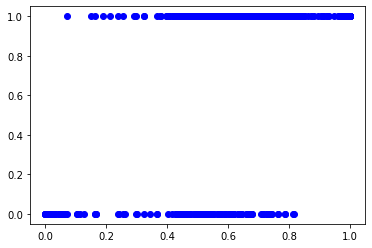

In [81]:
plt.plot(pred_train,forest[target],"bo")

In [82]:
np.corrcoef(pred_train,forest[target]) # we got high correlation 


array([[1.        , 0.44502812],
       [0.44502812, 1.        ]])

# gas_turbine

In [247]:
gas=pd.read_csv('C:/Users/kishore/Downloads/gas_turbines.csv')


In [248]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [249]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [250]:
#  Malignant as 0 and Beningn as 1

gas.loc[gas.TEY=="B","TEY"] = 1
gas.loc[gas.TEY=="M","TEY"] = 0

<AxesSubplot:>

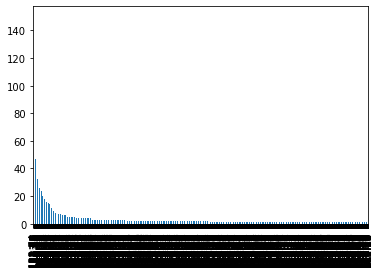

In [39]:
gas.TEY.value_counts().plot(kind="bar")

In [251]:
train,test = train_test_split(gas,test_size = 0.3,random_state=42)

In [252]:
train

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
11573,18.4780,1010.3,91.842,3.0906,19.986,1059.0,549.90,112.74,10.589,2.39850,60.350
911,7.3725,1024.2,72.386,5.8022,33.597,1100.3,527.53,163.18,14.132,0.43501,64.827
8762,9.8815,1005.7,97.608,5.3708,31.772,1100.1,532.67,159.48,13.673,0.49992,70.282
12767,23.4230,1015.1,84.436,3.6582,23.437,1078.9,550.00,124.49,11.529,1.32130,57.885
7120,10.9830,1015.0,87.833,3.7923,30.826,1099.9,533.12,158.47,13.687,0.40532,71.188
...,...,...,...,...,...,...,...,...,...,...,...
5191,23.6040,1008.1,76.645,4.2627,25.645,1090.3,550.18,134.09,12.094,1.59960,64.703
13418,20.3510,1009.2,88.674,3.9339,25.114,1089.9,550.00,134.41,12.066,1.44430,63.772
5390,16.3770,1014.9,75.963,3.3034,19.283,1055.0,549.96,109.77,10.437,5.64460,68.034
860,5.3891,1016.7,88.165,3.9176,19.625,1051.3,546.16,111.72,10.490,5.18040,113.650


In [253]:
train_x=train[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]

In [254]:
train_y=train['TEY']

In [255]:
test_x=test[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]

In [256]:
test_y=test['TEY']

In [258]:
X=gas[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]

In [259]:
Y=gas['TEY']

In [260]:
model = Sequential()
model.add(Dense(14, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [261]:
model

In [262]:
from keras.models import Sequential
from keras.layers import Dense
import numpy


In [263]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [264]:
# Fit the model
model.fit(X, Y, validation_split=0.33,epochs=15, batch_size=11)

Epoch 1/15
916/916 [==============================] - 4s 3ms/step - loss: -5039877.0332 - accuracy: 0.0000e+00 - val_loss: -72896080.0000 - val_accuracy: 0.0000e+00
Epoch 2/15
916/916 [==============================] - 2s 2ms/step - loss: -150910125.2432 - accuracy: 0.0000e+00 - val_loss: -490333312.0000 - val_accuracy: 0.0000e+00
Epoch 3/15
916/916 [==============================] - 2s 2ms/step - loss: -701255406.6914 - accuracy: 0.0000e+00 - val_loss: -1409850624.0000 - val_accuracy: 0.0000e+00
Epoch 4/15
916/916 [==============================] - 2s 3ms/step - loss: -1789470244.8506 - accuracy: 0.0000e+00 - val_loss: -2908833536.0000 - val_accuracy: 0.0000e+00
Epoch 5/15
916/916 [==============================] - 2s 2ms/step - loss: -3488844032.8375 - accuracy: 0.0000e+00 - val_loss: -5046826496.0000 - val_accuracy: 0.0000e+00
Epoch 6/15
916/916 [==============================] - 2s 2ms/step - loss: -5866533732.2225 - accuracy: 0.0000e+00 - val_loss: -7879215104.0000 - val_accuracy:

In [265]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -76027273216.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [266]:
scores

[-76027273216.0, 0.0]